In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PreProcessing


In [ ]:
import os
import random
import shutil
import glob
import cv2
from glob import glob
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Reshape, concatenate, Concatenate, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,TensorBoard,LearningRateScheduler

from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.color import rgb2gray as rtg
from skimage.io import imread, imshow
from skimage.transform import resize

In [ ]:
!unzip -q /content/drive/MyDrive/model/kvasir-seg.zip

In [ ]:
imagesPath = "/content/Kvasir-SEG/images/"
masksPath =  "/content/Kvasir-SEG/masks/"

In [ ]:
#get the image name
images_ids = next(os.walk(imagesPath))[2]
masks_ids = next(os.walk(masksPath))[2]
print(images_ids)

['cju40sdwukv3k0755y99ug1k8.jpg', 'cju6ur9l9v9jq0755paud9uka.jpg', 'cju1dhfok4mhe0878jlgrag0h.jpg', 'cju0u82z3cuma0835wlxrnrjv.jpg', 'cju87ox0kncom0801b98hqnd2.jpg', 'cju8aeei7q8k308173n9y4klv.jpg', 'cju83nwu1jxte0987h1krpfmv.jpg', 'cju5ufn3skquf0818dhapnhba.jpg', 'cju2m56cryvqd0801gtn2yp8t.jpg', 'cju1fuoa4wmc50835qfd11sp9.jpg', 'cju83rcnzkbsj0755x5anfrcg.jpg', 'cju8dk7eztzup08182yxko5zh.jpg', 'cju7dwe282dc309876rco45ts.jpg', 'cju2nfnvxzdkd0878399axlco.jpg', 'cju5ft6mcd5q40987rhjgbrr6.jpg', 'cju8418jhkf7d0818ga2v0xq0.jpg', 'cju2nqapmzvk20801f9us40dx.jpg', 'cju0t4oil7vzk099370nun5h9.jpg', 'cju5x00l6m5j608503k78ptee.jpg', 'cju1hirfi7ekp0855q0vgm9qq.jpg', 'cju14hjh2ob2o0835ouz3r5aa.jpg', 'cju7d8m3b2e210755l8fj1yph.jpg', 'cju7etr3y2p4t0801cdzjj8ab.jpg', 'cju40jl7skiuo0817p0smlgg8.jpg', 'cju3xuj20ivgp0818mij8bjrd.jpg', 'ck2bxqz3evvg20794iiyv5v2m.jpg', 'cju5wi6bqlxy90755bu227nvb.jpg', 'cju33o12x2jm50988944mxq0v.jpg', 'cju414lf2l1lt0801rl3hjllj.jpg', 'cju785htizjzo08017tvlhtg4.jpg', 'cju34ymm

In [ ]:
X = np.zeros((len(images_ids), 256, 256, 3), dtype=np.uint8)
Y = np.zeros((len(masks_ids), 256, 256, 1), dtype=np.bool_)

In [ ]:
for n, id_ in tqdm(enumerate(images_ids), total=len(images_ids)):
    path = imagesPath + "/" + id_
    img = imread(path)[:, :, :3]
    img = resize(img, (256, 256), mode="constant", preserve_range=True)
    X[n] = img
    mask = np.zeros((256, 256, 1), dtype=np.bool_)
    mask = imread(masksPath + "/" + id_)
    mask = rtg(mask)
    mask = np.expand_dims(resize(mask, (256, 256), mode="constant", preserve_range=True), axis=-1)
    Y[n] = mask

100%|██████████| 1000/1000 [00:58<00:00, 17.15it/s]


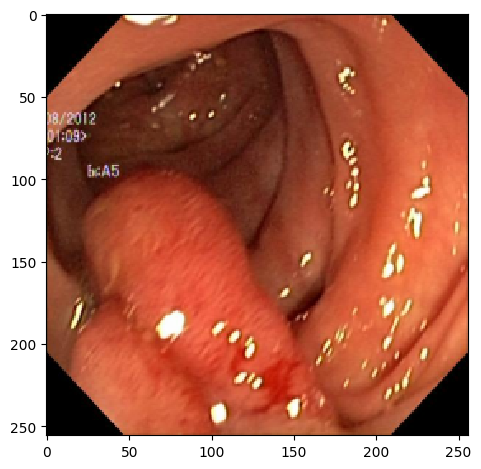

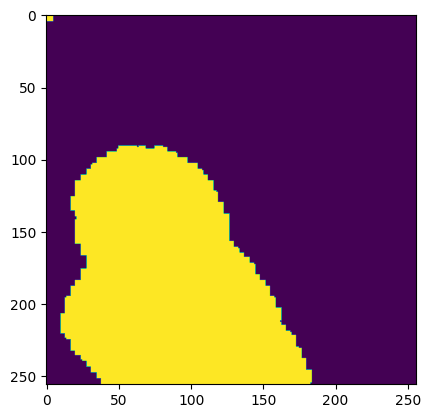

In [ ]:
import random
image_x = random.randint(0, len(images_ids))
imshow(X[image_x])
plt.show()
plt.imshow(np.squeeze(Y[image_x]))

In [ ]:
random_seed = 42

bootstrapped_indices = np.random.choice(1000, size=1000, replace=True)
X_bootstrap = X[bootstrapped_indices]
y_bootstrap = Y[bootstrapped_indices]


# Split into training and validation sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2, random_state=random_seed)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_test_1, y_test_1, test_size=0.5, random_state=random_seed)

bootstrapped_indices = np.random.choice(1000, size=1000, replace=True)
X_bootstrap = X[bootstrapped_indices]
y_bootstrap = Y[bootstrapped_indices]

# Split into training and validation sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2, random_state=random_seed)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_test_2, y_test_2, test_size=0.5, random_state=random_seed)

bootstrapped_indices = np.random.choice(1000, size=1000, replace=True)
X_bootstrap = X[bootstrapped_indices]
y_bootstrap = Y[bootstrapped_indices]

# Split into training and validation sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2, random_state=random_seed)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_test_3, y_test_3, test_size=0.5, random_state=random_seed)

In [ ]:
test_size = 0.2
validation_size = 0.5
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=validation_size, random_state=42)

In [ ]:
print("Train total:", len(X_train))
print("Valid total:", len(X_val))
print("Test total:", len(X_test))

Train total: 800
Valid total: 100
Test total: 100


In [ ]:
#Metrics
from tensorflow.keras import backend as K

# function to create dice coefficient
def dice_coef(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection + 1e-7) / (union + 1e-7)

def iou_coef(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    return (intersection + 1e-7) / (union + 1e-7)

def f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.math.round(y_pred), tf.float32)

    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))

    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    return f1

# Train U-Net, Deeplab, and Segnet


UNET MODEL

In [ ]:
def unet(input_size=(256, 256, 3)):
    inputs = Input(input_size)
    # First DownConvolution / Encoder Leg will begin, so start with Conv2D
    conv1 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(inputs)
    bn1 = Activation("relu")(conv1)
    conv1 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(bn1)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn1 = Activation("relu")(bn1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)

    conv2 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(pool1)
    bn2 = Activation("relu")(conv2)
    conv2 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(bn2)
    bn2 = BatchNormalization(axis=3)(conv2)
    bn2 = Activation("relu")(bn2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)

    conv3 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(pool2)
    bn3 = Activation("relu")(conv3)
    conv3 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(bn3)
    bn3 = BatchNormalization(axis=3)(conv3)
    bn3 = Activation("relu")(bn3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(bn3)

    conv4 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(pool3)
    bn4 = Activation("relu")(conv4)
    conv4 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(bn4)
    bn4 = BatchNormalization(axis=3)(conv4)
    bn4 = Activation("relu")(bn4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(bn4)

    conv5 = Conv2D(filters=1024, kernel_size=(3, 3), padding="same")(pool4)
    bn5 = Activation("relu")(conv5)
    conv5 = Conv2D(filters=1024, kernel_size=(3, 3), padding="same")(bn5)
    bn5 = BatchNormalization(axis=3)(conv5)
    bn5 = Activation("relu")(bn5)

    """ Now UpConvolution / Decoder Leg will begin, so start with Conv2DTranspose
    The gray arrows (in the above image) indicate the skip connections that concatenate the encoder feature map with the decoder, which helps the backward flow of gradients for improved training. """
    """ After every concatenation we again apply two consecutive regular convolutions so that the model can learn to assemble a more precise output """

    up6 = concatenate([Conv2DTranspose(512, kernel_size=(2, 2), strides=(2, 2), padding="same")(bn5), conv4], axis=3)
    conv6 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(up6)
    bn6 = Activation("relu")(conv6)
    conv6 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(bn6)
    bn6 = BatchNormalization(axis=3)(conv6)
    bn6 = Activation("relu")(bn6)

    up7 = concatenate([Conv2DTranspose(256, kernel_size=(2, 2), strides=(2, 2), padding="same")(bn6), conv3], axis=3)
    conv7 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(up7)
    bn7 = Activation("relu")(conv7)
    conv7 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(bn7)
    bn7 = BatchNormalization(axis=3)(conv7)
    bn7 = Activation("relu")(bn7)

    up8 = concatenate([Conv2DTranspose(128, kernel_size=(2, 2), strides=(2, 2), padding="same")(bn7), conv2], axis=3)
    conv8 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(up8)
    bn8 = Activation("relu")(conv8)
    conv8 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(bn8)
    bn8 = BatchNormalization(axis=3)(conv8)
    bn8 = Activation("relu")(bn8)

    up9 = concatenate([Conv2DTranspose(64, kernel_size=(2, 2), strides=(2, 2), padding="same")(bn8), conv1], axis=3)
    conv9 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(up9)
    bn9 = Activation("relu")(conv9)
    conv9 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(bn9)
    bn9 = BatchNormalization(axis=3)(conv9)
    bn9 = Activation("relu")(bn9)

    conv10 = Conv2D(filters=1, kernel_size=(1, 1), activation="sigmoid")(bn9)
    model = Model(inputs=[inputs], outputs=[conv10])

    return model

Deeplab Model

In [ ]:
def deeplab():

    atrous_rates = [6, 12, 18, 24]
    inputs = Input((256, 256, 3))

    # Encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    fusion_layer_deeplab = pool3

    # Atrous (dilated) Convolutions with Different Rates
    atrous_layers = []
    for rate in atrous_rates:
        atrous_layer = Conv2D(512, 3, activation='relu', padding='same', dilation_rate=rate)(conv5)
        atrous_layers.append(atrous_layer)

    # Concatenated Atrous Layers
    concat = Concatenate(axis=-1)(atrous_layers)

    # Decoder
    conv6 = Conv2D(512, 1, activation='relu', padding='same')(concat)

    upsample = Conv2DTranspose(1, kernel_size=16, strides=16, padding='same')(conv6)
    outputs = Conv2D(1, 1, activation='sigmoid')(upsample)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

SegNet Model

In [ ]:
def conv_block(inputs, filters, kernel_size=(3, 3), activation='relu', padding='same'):
    x = Conv2D(filters, kernel_size, activation=None, padding=padding)(inputs)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    return x

def SegNet():
    inputs = Input((256,256, 3))

    # Encoder
    conv1 = conv_block(inputs, 32)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = conv_block(pool1, 64)
    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = conv_block(pool2, 128)
    pool3 = MaxPooling2D((2, 2))(conv3)

    conv4 = conv_block(pool3, 256)
    pool4 = MaxPooling2D((2, 2))(conv4)

    # Center
    center = conv_block(pool4, 512)

    # Decoder
    up4 = UpSampling2D((2, 2))(center)
    concat4 = Concatenate(axis=-1)([conv4, up4])
    conv5 = conv_block(concat4, 256)

    up3 = UpSampling2D((2, 2))(conv5)
    concat3 = Concatenate(axis=-1)([conv3, up3])
    conv6 = conv_block(concat3, 128)

    up2 = UpSampling2D((2, 2))(conv6)
    concat2 = Concatenate(axis=-1)([conv2, up2])
    conv7 = conv_block(concat2, 64)

    up1 = UpSampling2D((2, 2))(conv7)
    concat1 = Concatenate(axis=-1)([conv1, up1])
    conv8 = conv_block(concat1, 32)

    # Output
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv8)

    model = Model(inputs=inputs, outputs=outputs)

    return model

In [ ]:
unet_preds_list = []
deeplab_preds_list = []
segnet_preds_list = []

unet_preds_list_t = []
deeplab_preds_list_t = []
segnet_preds_list_t = []


batch_size = 16
epoch_step = len(X_train)//batch_size
val_step = len(X_test)//batch_size

# Train SegNet model
segnet_model = SegNet()
optimizer = 'adam'
loss = 'binary_crossentropy'
segnet_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy',f1_score,dice_coef,iou_coef])
segnet_model.fit(X_train_1, y_train_1,steps_per_epoch=epoch_step,validation_steps=val_step,epochs=100, validation_data=(X_test_1, y_test_1))
segnet_model.save('/content/drive/MyDrive/Result/segnet_modelboot.h5')
segnet_preds = segnet_model.predict(X_val)
segnet_preds_t = segnet_model.predict(X_test)
segnet_preds_list.append(segnet_preds)
segnet_preds_list_t.append(segnet_preds_t)
# Train U-Net model
unet_model = unet()
optimizer = 'adam'
loss = 'binary_crossentropy'
unet_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy',f1_score,dice_coef,iou_coef])
unet_model.fit(X_train_2, y_train_2,steps_per_epoch=epoch_step,validation_steps=val_step,epochs=100, validation_data=(X_test_2, y_test_2))
unet_model.save('/content/drive/MyDrive/Result/unet_modelboot.h5')
unet_preds = unet_model.predict(X_val)
unet_preds_t = unet_model.predict(X_test)
unet_preds_list.append(unet_preds)
unet_preds_list_t.append(unet_preds_t)

# Train DeepLab model
deeplab_model = deeplab()
optimizer = 'adam'
loss = 'binary_crossentropy'
deeplab_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy',f1_score,dice_coef,iou_coef])
deeplab_model.fit(X_train_3, y_train_3,steps_per_epoch=epoch_step,validation_steps=val_step,epochs=100, validation_data=(X_test_3, y_test_3))
deeplab_model.save('/content/drive/MyDrive/Result/deeplab_modelboot.h5')
deeplab_preds = deeplab_model.predict(X_val)
deeplab_preds_t = deeplab_model.predict(X_test)
deeplab_preds_list.append(deeplab_preds)
deeplab_preds_list_t.append(deeplab_preds_t)

Epoch 1/100
50/50 [==============================] - 27s 139ms/step - loss: 0.3922 - accuracy: 0.8241 - f1_score: 0.3366 - dice_coef: 0.3331 - iou_coef: 0.2007 - val_loss: 1.7868 - val_accuracy: 0.8066 - val_f1_score: 0.0000e+00 - val_dice_coef: 0.0124 - val_iou_coef: 0.0062
Epoch 2/100
50/50 [==============================] - 4s 78ms/step - loss: 0.3357 - accuracy: 0.8501 - f1_score: 0.5083 - dice_coef: 0.4070 - iou_coef: 0.2562 - val_loss: 0.7146 - val_accuracy: 0.7615 - val_f1_score: 0.0926 - val_dice_coef: 0.1759 - val_iou_coef: 0.0966
Epoch 3/100
50/50 [==============================] - 4s 75ms/step - loss: 0.3212 - accuracy: 0.8578 - f1_score: 0.5213 - dice_coef: 0.4262 - iou_coef: 0.2717 - val_loss: 0.4320 - val_accuracy: 0.8023 - val_f1_score: 0.1897 - val_dice_coef: 0.3064 - val_iou_coef: 0.1811
Epoch 4/100
50/50 [==============================] - 4s 79ms/step - loss: 0.3025 - accuracy: 0.8674 - f1_score: 0.5726 - dice_coef: 0.4683 - iou_coef: 0.3067 - val_loss: 0.7914 - val_a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 38ms/step
Epoch 1/100
50/50 [==============================] - 34s 334ms/step - loss: 0.5408 - accuracy: 0.6877 - f1_score: 0.2688 - dice_coef: 0.2965 - iou_coef: 0.1748 - val_loss: 1.0355 - val_accuracy: 0.6227 - val_f1_score: 0.1489 - val_dice_coef: 0.1485 - val_iou_coef: 0.0808
Epoch 2/100
50/50 [==============================] - 12s 232ms/step - loss: 0.3848 - accuracy: 0.8198 - f1_score: 0.2784 - dice_coef: 0.3275 - iou_coef: 0.1967 - val_loss: 0.7297 - val_accuracy: 0.6428 - val_f1_score: 0.4113 - val_dice_coef: 0.3795 - val_iou_coef: 0.2352
Epoch 3/100
50/50 [==============================] - 12s 232ms/step - loss: 0.3635 - accuracy: 0.8338 - f1_score: 0.3779 - dice_coef: 0.3575 - iou_coef: 0.2183 - val_loss: 0.3898 - val_accuracy: 0.7935 - val_f1_score: 0.5247 - val_dice_coef: 0.4388 - val_iou_coef: 0.2820
Epoch 4/100
50/50 [==============================] - 11s 229ms/step - loss: 0.3490 - accuracy: 0.8444 - f1_score: 0.4525 - dice_coef

**Meta-Model to combine prediction**

# Meta-Model


In [ ]:
# unet_preds_list = []
# deeplab_preds_list = []
# segnet_preds_list = []

# unet_preds_list_t = []
# deeplab_preds_list_t = []
# segnet_preds_list_t = []

# # Number of model runs
# num_runs = 1

# batch_size = 8
# epoch_step = len(X_train)//batch_size
# val_step = len(X_test)//batch_size

# custom_objects = {'iou_coef': iou_coef, 'f1_score':f1_score, 'dice_coef':dice_coef}

# # Train SegNet model
# segnet_model = load_model('/content/drive/MyDrive/Result/segnet_model.h5',custom_objects = custom_objects)
# segnet_preds = segnet_model.predict(X_val)
# segnet_preds_t = segnet_model.predict(X_test)
# segnet_preds_list.append(segnet_preds)
# segnet_preds_list_t.append(segnet_preds_t)
# # Train U-Net model
# unet_model = load_model('/content/drive/MyDrive/Result/unet_model.h5',custom_objects = custom_objects)
# unet_preds = unet_model.predict(X_val)
# unet_preds_t = unet_model.predict(X_test)
# unet_preds_list.append(unet_preds)
# unet_preds_list_t.append(unet_preds_t)

# # Train DeepLab model
# deeplab_model = load_model('/content/drive/MyDrive/Result/deeplab_model.h5',custom_objects = custom_objects)
# deeplab_preds = deeplab_model.predict(X_val)
# deeplab_preds_t = deeplab_model.predict(X_test)
# deeplab_preds_list.append(deeplab_preds)
# deeplab_preds_list_t.append(deeplab_preds_t)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, jaccard_score

stacked_unet_preds = np.stack(unet_preds_list, axis=-1)
stacked_deeplab_preds = np.stack(deeplab_preds_list, axis=-1)
stacked_segnet_preds = np.stack(segnet_preds_list, axis=-1)

stacked_unet_preds_t = np.stack(unet_preds_list_t, axis=-1)
stacked_deeplab_preds_t = np.stack(deeplab_preds_list_t, axis=-1)
stacked_segnet_preds_t = np.stack(segnet_preds_list_t, axis=-1)

#combined validation set prediction of unet deeplab and segnet
meta_features = np.concatenate([stacked_unet_preds, stacked_deeplab_preds,stacked_segnet_preds], axis=-1)
#combined test set prediction of unet deeplab and segnet
meta_features_t = np.concatenate([stacked_unet_preds_t, stacked_deeplab_preds_t,stacked_segnet_preds_t], axis=-1)

y_train_reshaped = y_val[:meta_features.shape[0]]

y_train_flat = y_train_reshaped.flatten()


In [ ]:
y_test_reshaped = y_test[:stacked_unet_preds.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()
from sklearn.metrics import accuracy_score, f1_score, jaccard_score

segnet_accuracy = accuracy_score(y_test_flat, np.round(stacked_segnet_preds_t).flatten())
segnet_f1 = f1_score(y_test_flat, np.round(stacked_segnet_preds_t).flatten(), average='macro')
segnet_roc_auc = roc_auc_score(y_test_flat, np.round(stacked_segnet_preds_t).flatten())
segnet_precision = precision_score(y_test_flat, np.round(stacked_segnet_preds_t).flatten())
segnet_recall = recall_score(y_test_flat, np.round(stacked_segnet_preds_t).flatten())
segnet_iou = jaccard_score(y_test_flat, np.round(stacked_segnet_preds_t).flatten())

# Calculate accuracy and F1 scores for U-Net predictions
unet_accuracy = accuracy_score(y_test_flat, np.round(stacked_unet_preds_t).flatten())
unet_f1 = f1_score(y_test_flat, np.round(stacked_unet_preds_t).flatten(), average='macro')
unet_roc_auc = roc_auc_score(y_test_flat, np.round(stacked_unet_preds_t).flatten())
unet_precision = precision_score(y_test_flat, np.round(stacked_unet_preds_t).flatten())
unet_recall = recall_score(y_test_flat, np.round(stacked_unet_preds_t).flatten())
unet_iou = jaccard_score(y_test_flat, np.round(stacked_unet_preds_t).flatten())

# Calculate accuracy and F1 scores for DeepLab predictions
deeplab_accuracy = accuracy_score(y_test_flat, np.round(stacked_deeplab_preds_t).flatten())
deeplab_f1 = f1_score(y_test_flat, np.round(stacked_deeplab_preds_t).flatten(), average='macro')
deeplab_roc_auc = roc_auc_score(y_test_flat, np.round(stacked_deeplab_preds_t).flatten())
deeplab_precision = precision_score(y_test_flat, np.round(stacked_deeplab_preds_t).flatten())
deeplab_recall = recall_score(y_test_flat, np.round(stacked_deeplab_preds_t).flatten())
deeplab_iou = jaccard_score(y_test_flat, np.round(stacked_deeplab_preds_t).flatten())

# Print the accuracy and F1 scores
print("SegNet Accuracy:", segnet_accuracy)
print("SegNet F1 Score:", segnet_f1)
print("SegNet ROC-AUC:", segnet_roc_auc)
print("SegNet Precision:", segnet_precision)
print("SegNet Recall:", segnet_recall)
print("SegNet IoU:", segnet_iou)
print('\n')
print("U-Net Accuracy:", unet_accuracy)
print("U-Net F1 Score:", unet_f1)
print("U-Net ROC-AUC:", unet_roc_auc)
print("U-Net Precision:", unet_precision)
print("U-Net Recall:", unet_recall)
print("U-Net IoU:", unet_iou)
print('\n')
print("DeepLab Accuracy:", deeplab_accuracy)
print("DeepLab F1 Score:", deeplab_f1)
print("DeepLab ROC-AUC:", deeplab_roc_auc)
print("DeepLab Precision:", deeplab_precision)
print("DeepLab Recall:", deeplab_recall)
print("DeepLab IoU:", deeplab_iou)
print('\n')

SegNet Accuracy: 0.9673387145996094
SegNet F1 Score: 0.9356453664974604
SegNet ROC-AUC: 0.9287355632488483
SegNet Precision: 0.9083971139031204
SegNet Recall: 0.8732623191823505
SegNet IoU: 0.802586629873795


U-Net Accuracy: 0.9677792358398437
U-Net F1 Score: 0.9369552626162518
U-Net ROC-AUC: 0.9330158768637287
U-Net Precision: 0.9029050505174875
U-Net Recall: 0.8830604657230449
U-Net IoU: 0.8064766827506885


DeepLab Accuracy: 0.9505935668945312
DeepLab F1 Score: 0.9060294538599925
DeepLab ROC-AUC: 0.9139726064021239
DeepLab Precision: 0.8221964870537095
DeepLab Recall: 0.8613477970727987
DeepLab IoU: 0.7260975048556173




# Multiple Stacking (Consist of 3 Layers)

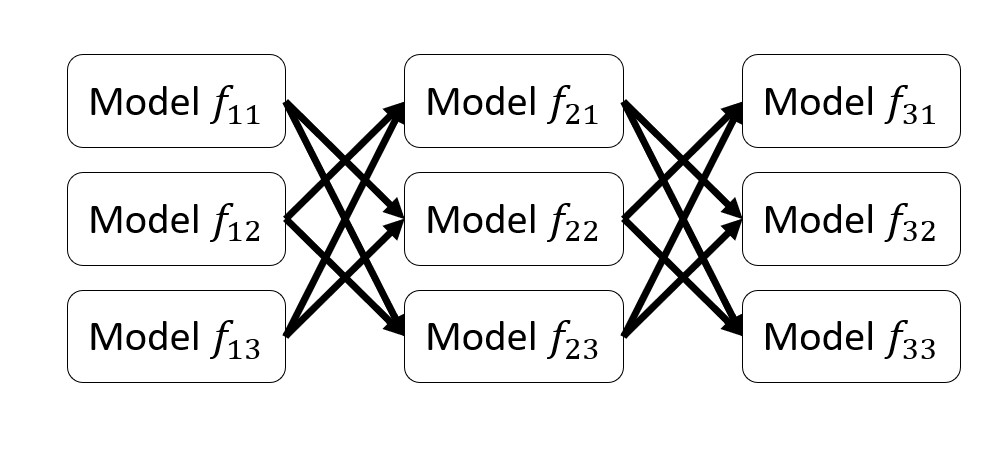

Layer 1

Layer 11 Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gn_meta_model = GaussianNB()
gn_meta_model.fit(meta_features.reshape(-1, meta_features.shape[-1]), y_train_flat)
gn_train_prob =  gn_meta_model.predict_proba(meta_features.reshape(-1, meta_features.shape[-1]))
gn_test_prob = gn_meta_model.predict_proba(meta_features_t.reshape(-1, meta_features_t.shape[-1]))

gn_train =  gn_meta_model.predict(meta_features.reshape(-1, meta_features.shape[-1]))
gn_test = gn_meta_model.predict(meta_features_t.reshape(-1, meta_features_t.shape[-1]))

y_test_reshaped = y_test[:gn_test.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

gn_ensemble_accuracy = accuracy_score(y_test_flat, gn_test)
gn_ensemble_f1 = f1_score(y_test_flat, gn_test, average='macro')
gn_ensemble_roc_auc = roc_auc_score(y_test_flat, gn_test)
gn_ensemble_precision = precision_score(y_test_flat, gn_test)
gn_ensemble_recall = recall_score(y_test_flat, gn_test)
gn_ensemble_iou = jaccard_score(y_test_flat, gn_test)

# Display ensemble metrics
print("GN Ensemble Accuracy:", gn_ensemble_accuracy)
print("GN Ensemble F1 Score:", gn_ensemble_f1)
print("GN Ensemble ROC-AUC:", gn_ensemble_roc_auc)
print("GN Ensemble Precision:", gn_ensemble_precision)
print("GN Ensemble Recall:", gn_ensemble_recall)
print("GN Ensemble IoU:", gn_ensemble_iou)

GN Ensemble Accuracy: 0.9519073486328125
GN Ensemble F1 Score: 0.9165450542043846
GN Ensemble ROC-AUC: 0.9673916941754178
GN Ensemble Precision: 0.7638679434539093
GN Ensemble Recall: 0.9896429055257573
GN Ensemble IoU: 0.7578098225414063


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_meta_model = RandomForestClassifier(n_estimators=32, random_state=42,verbose=2)
rfc_meta_model.fit(meta_features.reshape(-1, meta_features.shape[-1]), y_train_flat)
rfc_train_prob =  rfc_meta_model.predict_proba(meta_features.reshape(-1, meta_features.shape[-1]))
rfc_test_prob = rfc_meta_model.predict_proba(meta_features_t.reshape(-1, meta_features_t.shape[-1]))

rfc_train =  rfc_meta_model.predict(meta_features.reshape(-1, meta_features.shape[-1]))
rfc_test = rfc_meta_model.predict(meta_features_t.reshape(-1, meta_features_t.shape[-1]))

y_test_reshaped = y_test[:rfc_test.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

rfc_ensemble_accuracy = accuracy_score(y_test_flat, rfc_test)
rfc_ensemble_f1 = f1_score(y_test_flat, rfc_test, average='macro')
rfc_ensemble_roc_auc = roc_auc_score(y_test_flat, rfc_test)
rfc_ensemble_precision = precision_score(y_test_flat, rfc_test)
rfc_ensemble_recall = recall_score(y_test_flat, rfc_test)
rfc_ensemble_iou = jaccard_score(y_test_flat, rfc_test)

# Display ensemble metrics
print("rfc Ensemble Accuracy:", rfc_ensemble_accuracy)
print("rfc Ensemble F1 Score:", rfc_ensemble_f1)
print("rfc Ensemble ROC-AUC:", rfc_ensemble_roc_auc)
print("rfc Ensemble Precision:", rfc_ensemble_precision)
print("rfc Ensemble Recall:", rfc_ensemble_recall)
print("rfc Ensemble IoU:", rfc_ensemble_iou)

building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32
rfc Ensemble Accuracy: 0.9834776306152344
rfc Ensemble F1 Score: 0.9678295553545164
rfc Ensemble ROC-AUC: 0.965879997215984
rfc Ensemble Precision: 0.9502430063443208
rfc Ensemble Recall: 0.9405919629910238
rfc Ensemble IoU: 0.8964407825209569


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_meta_model = DecisionTreeClassifier()
dt_meta_model.fit(meta_features.reshape(-1, meta_features.shape[-1]), y_train_flat)
dt_train_prob = dt_meta_model.predict_proba(meta_features.reshape(-1, meta_features.shape[-1]))
dt_test_prob = dt_meta_model.predict_proba(meta_features_t.reshape(-1, meta_features_t.shape[-1]))

dt_test = dt_meta_model.predict(meta_features_t.reshape(-1, meta_features_t.shape[-1]))

y_test_reshaped = y_test[:dt_test.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

dt_ensemble_accuracy = accuracy_score(y_test_flat, dt_test)
dt_ensemble_f1 = f1_score(y_test_flat, dt_test, average='macro')
dt_ensemble_roc_auc = roc_auc_score(y_test_flat, dt_test)
dt_ensemble_precision = precision_score(y_test_flat, dt_test)
dt_ensemble_recall = recall_score(y_test_flat, dt_test)
dt_ensemble_iou = jaccard_score(y_test_flat, dt_test)

# Display ensemble metrics
print("dt Ensemble Accuracy:", dt_ensemble_accuracy)
print("dt Ensemble F1 Score:", dt_ensemble_f1)
print("dt Ensemble ROC-AUC:", dt_ensemble_roc_auc)
print("dt Ensemble Precision:", dt_ensemble_precision)
print("dt Ensemble Recall:", dt_ensemble_recall)
print("dt Ensemble IoU:", dt_ensemble_iou)

dt Ensemble Accuracy: 0.9769549560546875
dt Ensemble F1 Score: 0.9555443803839547
dt Ensemble ROC-AUC: 0.9578823270107476
dt Ensemble Precision: 0.9189822959294414
dt Ensemble Recall: 0.9304747043446411
dt Ensemble IoU: 0.8599335967206425


In [ ]:
meta_features_1_12 = np.column_stack((gn_train_prob,rfc_train_prob))
meta_features_test1_12 = np.column_stack((gn_test_prob,rfc_test_prob))

In [ ]:
meta_features_1_23 = np.column_stack((rfc_train_prob,dt_train_prob))
meta_features_test1_23 = np.column_stack((rfc_test_prob,dt_test_prob))

In [ ]:
meta_features_1_13 = np.column_stack((gn_train_prob,dt_train_prob))
meta_features_test1_13 = np.column_stack((gn_test_prob,dt_test_prob))

Layer 21

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_meta_model = DecisionTreeClassifier()
dt_meta_model.fit(meta_features_1_12, y_train_flat)
dt_train2_prob =  dt_meta_model.predict_proba(meta_features_1_12)
dt_test2_prob = dt_meta_model.predict_proba(meta_features_test1_12)
dt_test2 = dt_meta_model.predict(meta_features_test1_12)

y_test_reshaped = y_test[:dt_test2.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

dt_ensemble_accuracy = accuracy_score(y_test_flat, dt_test2)
dt_ensemble_f1 = f1_score(y_test_flat, dt_test2, average='macro')
dt_ensemble_roc_auc = roc_auc_score(y_test_flat, dt_test2)
dt_ensemble_precision = precision_score(y_test_flat, dt_test2)
dt_ensemble_recall = recall_score(y_test_flat, dt_test2)
dt_ensemble_iou = jaccard_score(y_test_flat, dt_test2)

# Display ensemble metrics
print("dt Ensemble Accuracy:", dt_ensemble_accuracy)
print("dt Ensemble F1 Score:", dt_ensemble_f1)
print("dt Ensemble ROC-AUC:", dt_ensemble_roc_auc)
print("dt Ensemble Precision:", dt_ensemble_precision)
print("dt Ensemble Recall:", dt_ensemble_recall)
print("dt Ensemble IoU:", dt_ensemble_iou)

dt Ensemble Accuracy: 0.9805392456054688
dt Ensemble F1 Score: 0.9623982823466093
dt Ensemble ROC-AUC: 0.9640221651126898
dt Ensemble Precision: 0.9323083688956592
dt Ensemble Recall: 0.9402868998459631
dt Ensemble IoU: 0.8801951626417973


Layer 22

In [ ]:
from sklearn.naive_bayes import GaussianNB

gn_meta_model = GaussianNB()
gn_meta_model.fit(meta_features_1_23, y_train_flat)
gn_train2_prob =  gn_meta_model.predict_proba(meta_features_1_23)
gn_test2_prob = gn_meta_model.predict_proba(meta_features_test1_23)

gn_test2 = gn_meta_model.predict(meta_features_test1_23)

y_test_reshaped = y_test[:gn_test2.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

gn_ensemble_accuracy = accuracy_score(y_test_flat, gn_test2)
gn_ensemble_f1 = f1_score(y_test_flat, gn_test2, average='macro')
gn_ensemble_roc_auc = roc_auc_score(y_test_flat, gn_test2)
gn_ensemble_precision = precision_score(y_test_flat, gn_test2)
gn_ensemble_recall = recall_score(y_test_flat, gn_test2)
gn_ensemble_iou = jaccard_score(y_test_flat, gn_test2)

# Display ensemble metrics
print("GN Ensemble Accuracy:", gn_ensemble_accuracy)
print("GN Ensemble F1 Score:", gn_ensemble_f1)
print("GN Ensemble ROC-AUC:", gn_ensemble_roc_auc)
print("GN Ensemble Precision:", gn_ensemble_precision)
print("GN Ensemble Recall:", gn_ensemble_recall)
print("GN Ensemble IoU:", gn_ensemble_iou)

GN Ensemble Accuracy: 0.9748323059082031
GN Ensemble F1 Score: 0.951968506937992
GN Ensemble ROC-AUC: 0.9592265008755795
GN Ensemble Precision: 0.9015351097445089
GN Ensemble Recall: 0.9368007506158964
GN Ensemble IoU: 0.849847288286033


Layer23

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_meta_model = RandomForestClassifier(n_estimators=32, random_state=42,verbose=2)
rfc_meta_model.fit(meta_features_1_13, y_train_flat)
rfc_train2_prob =  rfc_meta_model.predict_proba(meta_features_1_13)
rfc_test2_prob = rfc_meta_model.predict_proba(meta_features_test1_13)

rfc_test2 = rfc_meta_model.predict(meta_features_test1_13)

y_test_reshaped = y_test[:rfc_test2.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

rfc_ensemble_accuracy = accuracy_score(y_test_flat, rfc_test2)
rfc_ensemble_f1 = f1_score(y_test_flat, rfc_test2, average='macro')
rfc_ensemble_roc_auc = roc_auc_score(y_test_flat, rfc_test2)
rfc_ensemble_precision = precision_score(y_test_flat, rfc_test2)
rfc_ensemble_recall = recall_score(y_test_flat, rfc_test2)
rfc_ensemble_iou = jaccard_score(y_test_flat, rfc_test2)

# Display ensemble metrics
print("rfc Ensemble Accuracy:", rfc_ensemble_accuracy)
print("rfc Ensemble F1 Score:", rfc_ensemble_f1)
print("rfc Ensemble ROC-AUC:", rfc_ensemble_roc_auc)
print("rfc Ensemble Precision:", rfc_ensemble_precision)
print("rfc Ensemble Recall:", rfc_ensemble_recall)
print("rfc Ensemble IoU:", rfc_ensemble_iou)

building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32
rfc Ensemble Accuracy: 0.9769541931152343
rfc Ensemble F1 Score: 0.9555430357580418
rfc Ensemble ROC-AUC: 0.9578822889079625
rfc Ensemble Precision: 0.9189769114277332
rfc Ensemble Recall: 0.9304757078418288
rfc Ensemble IoU: 0.8599297390439836


In [ ]:
meta_features_2_12 = np.column_stack((dt_train2_prob,gn_train2_prob))
meta_features_test2_12 = np.column_stack((dt_test2_prob,gn_test2_prob))

In [ ]:
meta_features_2_23 = np.column_stack((gn_train2_prob,rfc_train2_prob))
meta_features_test2_23 = np.column_stack((gn_test2_prob,rfc_test2_prob))

In [ ]:
meta_features_2_13 = np.column_stack((dt_train2_prob,rfc_train2_prob))
meta_features_test2_13 = np.column_stack((dt_test2_prob,rfc_test2_prob))

Layer 31

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_meta_model = RandomForestClassifier(n_estimators=32, random_state=42,verbose=2)
rfc_meta_model.fit(meta_features_2_12, y_train_flat)
rfc_train3_prob =  rfc_meta_model.predict_proba(meta_features_2_12)
rfc_test3_prob = rfc_meta_model.predict_proba(meta_features_test2_12)

rfc_test3 = rfc_meta_model.predict(meta_features_test2_12)

y_test_reshaped = y_test[:rfc_test3.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

rfc_ensemble_accuracy = accuracy_score(y_test_flat, rfc_test3)
rfc_ensemble_f1 = f1_score(y_test_flat, rfc_test3, average='macro')
rfc_ensemble_roc_auc = roc_auc_score(y_test_flat, rfc_test3)
rfc_ensemble_precision = precision_score(y_test_flat, rfc_test3)
rfc_ensemble_recall = recall_score(y_test_flat, rfc_test3)
rfc_ensemble_iou = jaccard_score(y_test_flat, rfc_test3)

# Display ensemble metrics
print("rfc Ensemble Accuracy:", rfc_ensemble_accuracy)
print("rfc Ensemble F1 Score:", rfc_ensemble_f1)
print("rfc Ensemble ROC-AUC:", rfc_ensemble_roc_auc)
print("rfc Ensemble Precision:", rfc_ensemble_precision)
print("rfc Ensemble Recall:", rfc_ensemble_recall)
print("rfc Ensemble IoU:", rfc_ensemble_iou)

building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32
rfc Ensemble Accuracy: 0.9785261535644532
rfc Ensemble F1 Score: 0.958794564467266
rfc Ensemble ROC-AUC: 0.9636137853370662
rfc Ensemble Precision: 0.9186736437127331
rfc Ensemble Recall: 0.9421845130279023
rfc Ensemble IoU: 0.8696491026572017


Layer 32

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_meta_model = DecisionTreeClassifier()
dt_meta_model.fit(meta_features_2_23, y_train_flat)
dt_train3_prob =  dt_meta_model.predict_proba(meta_features_2_23)
dt_test3_prob = dt_meta_model.predict_proba(meta_features_test2_23)

dt_test3 = dt_meta_model.predict(meta_features_test2_23)

y_test_reshaped = y_test[:dt_test3.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

dt_ensemble_accuracy = accuracy_score(y_test_flat, dt_test3)
dt_ensemble_f1 = f1_score(y_test_flat, dt_test3, average='macro')
dt_ensemble_roc_auc = roc_auc_score(y_test_flat, dt_test3)
dt_ensemble_precision = precision_score(y_test_flat, dt_test3)
dt_ensemble_recall = recall_score(y_test_flat, dt_test3)
dt_ensemble_iou = jaccard_score(y_test_flat, dt_test3)

# Display ensemble metrics
print("dt Ensemble Accuracy:", dt_ensemble_accuracy)
print("dt Ensemble F1 Score:", dt_ensemble_f1)
print("dt Ensemble ROC-AUC:", dt_ensemble_roc_auc)
print("dt Ensemble Precision:", dt_ensemble_precision)
print("dt Ensemble Recall:", dt_ensemble_recall)
print("dt Ensemble IoU:", dt_ensemble_iou)

dt Ensemble Accuracy: 0.9769549560546875
dt Ensemble F1 Score: 0.9555443803839547
dt Ensemble ROC-AUC: 0.9578823270107476
dt Ensemble Precision: 0.9189822959294414
dt Ensemble Recall: 0.9304747043446411
dt Ensemble IoU: 0.8599335967206425


Layer 33

In [ ]:
from sklearn.naive_bayes import GaussianNB

gn_meta_model = GaussianNB()
gn_meta_model.fit(meta_features_2_13, y_train_flat)
gn_train3_prob =  gn_meta_model.predict_proba(meta_features_2_13)
gn_test3_prob = gn_meta_model.predict_proba(meta_features_test2_13)

gn_test_3 = gn_meta_model.predict(meta_features_test2_13)

y_test_reshaped = y_test[:gn_test_3.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

gn_ensemble_accuracy = accuracy_score(y_test_flat, gn_test_3)
gn_ensemble_f1 = f1_score(y_test_flat, gn_test_3, average='macro')
gn_ensemble_f1 = f1_score(y_test_flat, gn_test2, average='macro')
gn_ensemble_roc_auc = roc_auc_score(y_test_flat, gn_test_3)
gn_ensemble_precision = precision_score(y_test_flat, gn_test_3)
gn_ensemble_recall = recall_score(y_test_flat, gn_test_3)
gn_ensemble_iou = jaccard_score(y_test_flat, gn_test_3)

# Display ensemble metrics
print("GN Ensemble Accuracy:", gn_ensemble_accuracy)
print("GN Ensemble F1 Score:", gn_ensemble_f1)
print("GN Ensemble ROC-AUC:", gn_ensemble_roc_auc)
print("GN Ensemble Precision:", gn_ensemble_precision)
print("GN Ensemble Recall:", gn_ensemble_recall)
print("GN Ensemble IoU:", gn_ensemble_iou)

GN Ensemble Accuracy: 0.9744816589355468
GN Ensemble F1 Score: 0.951968506937992
GN Ensemble ROC-AUC: 0.967152261737054
GN Ensemble Precision: 0.8848893616784276
GN Ensemble Recall: 0.9566198200729542
GN Ensemble IoU: 0.8507509439788384


In [ ]:
meta_features_3 = np.column_stack((rfc_train3_prob,dt_train3_prob,gn_train3_prob))
meta_features_test3 = np.column_stack((rfc_test3_prob,dt_test3_prob,gn_test3_prob))

Final Prediction (Final Multiple Stacking Result)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_meta_model = LogisticRegression(random_state=42, verbose=1)
lr_meta_model.fit(meta_features_3, y_train_flat)
lr_trainfinal_prob =  lr_meta_model.predict_proba(meta_features_3)
lr_testfinal_prob = lr_meta_model.predict_proba(meta_features_test3)

lr_testfinal = lr_meta_model.predict(meta_features_test3)

y_test_reshaped = y_test[:lr_testfinal.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

lr_ensemble_accuracy = accuracy_score(y_test_flat, lr_testfinal)
lr_ensemble_f1 = f1_score(y_test_flat, lr_testfinal, average='macro')
lr_ensemble_roc_auc = roc_auc_score(y_test_flat, lr_testfinal)
lr_ensemble_precision = precision_score(y_test_flat, lr_testfinal)
lr_ensemble_recall = recall_score(y_test_flat, lr_testfinal)
lr_ensemble_iou = jaccard_score(y_test_flat, lr_testfinal)

# Display ensemble metrics
print("LR Ensemble Accuracy:", lr_ensemble_accuracy)
print("LR Ensemble F1 Score:", lr_ensemble_f1)
print("LR Ensemble ROC-AUC:", lr_ensemble_roc_auc)
print("LR Ensemble Precision:", lr_ensemble_precision)
print("LR Ensemble Recall:", lr_ensemble_recall)
print("LR Ensemble IoU:", lr_ensemble_iou)

LR Ensemble Accuracy: 0.9765057373046875
LR Ensemble F1 Score: 0.9547455198212897
LR Ensemble ROC-AUC: 0.9577656783452105
LR Ensemble Precision: 0.9160126836657808
LR Ensemble Recall: 0.9308359633322127
LR Ensemble IoU: 0.8576394924387276


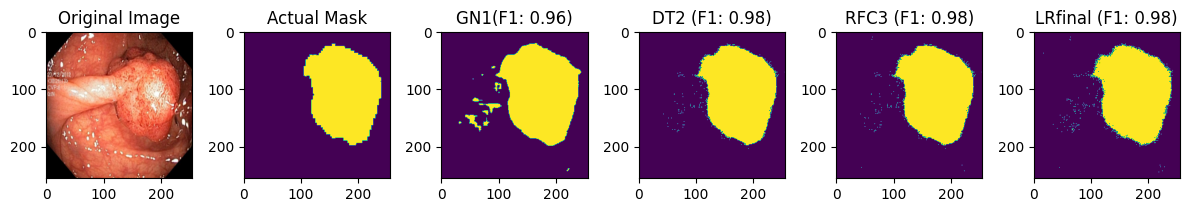

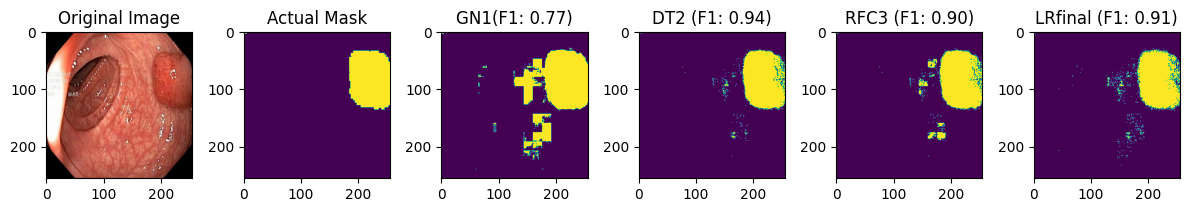

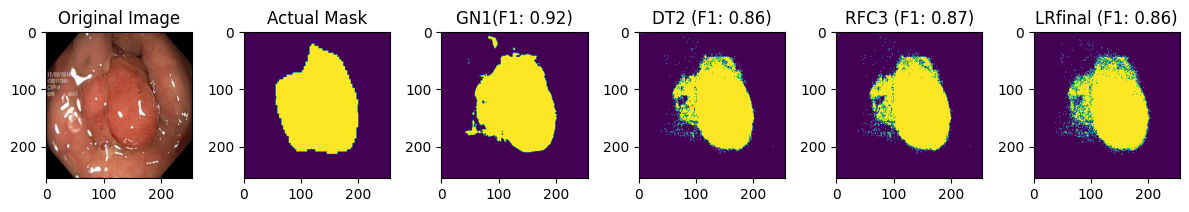

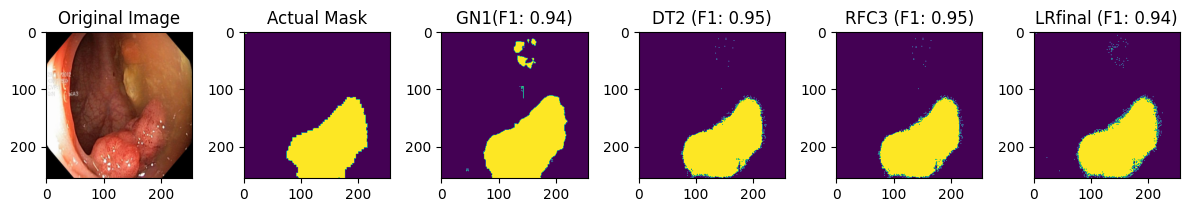

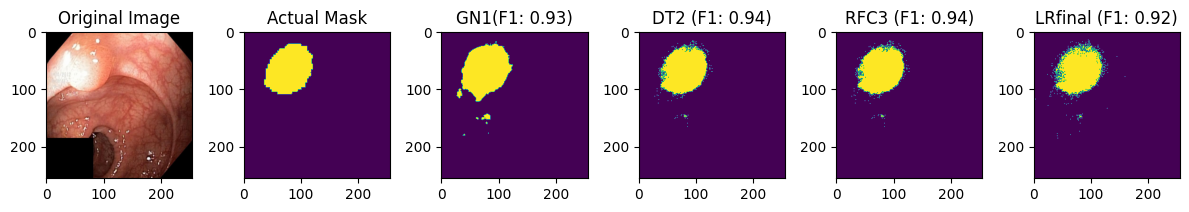

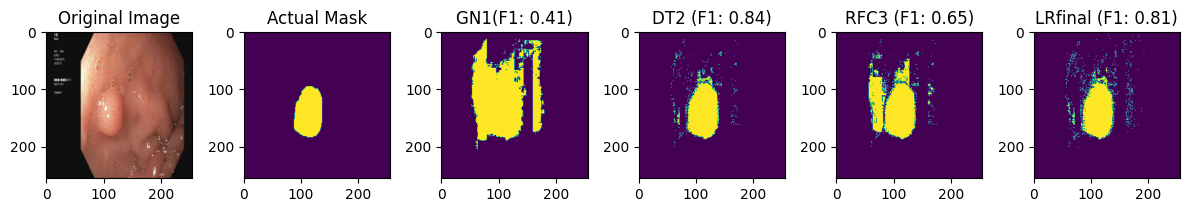

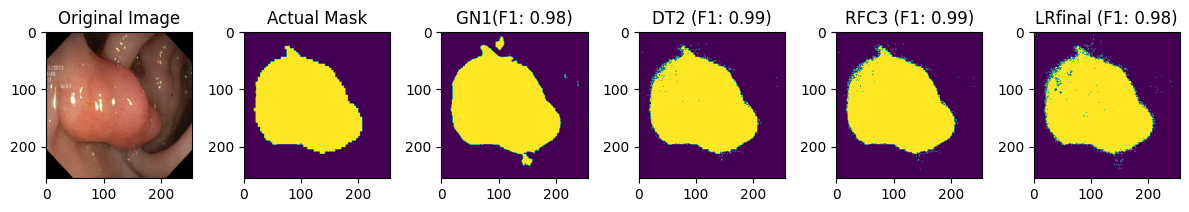

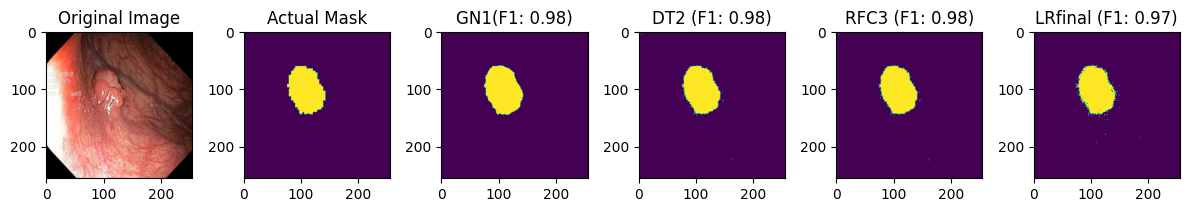

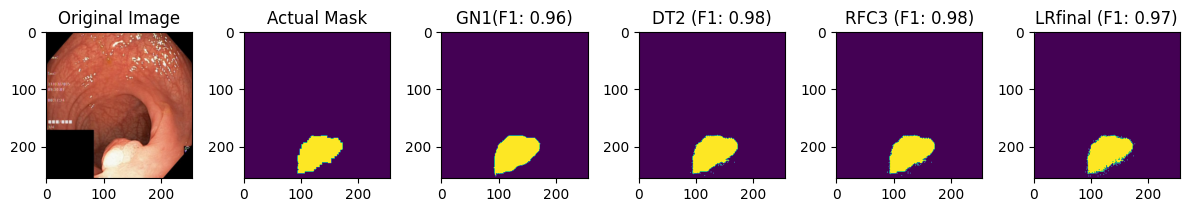

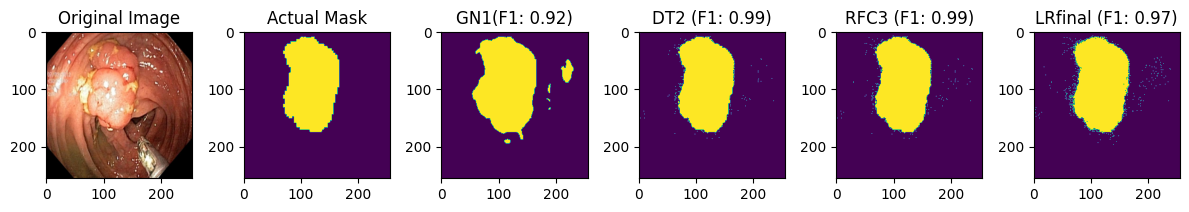

In [ ]:
# rfc_ensemble_preds = rfc_ensemble_preds_flat.reshape(y_test_reshaped.shape)
gn_ensemble_preds = gn_test.reshape(y_test_reshaped.shape)
dt_ensemble_preds = dt_test2.reshape(y_test_reshaped.shape)
rfc_ensemble_preds = rfc_test3.reshape(y_test_reshaped.shape)
lrfinal_ensemble_preds = lr_testfinal.reshape(y_test_reshaped.shape)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

num_samples_to_visualize = 10
random_indices = np.random.choice(range(len(X_test)), num_samples_to_visualize, replace=False)
# f1_scores_rfc = []
f1_scores_gn = []
f1_scores_dt = []
f1_scores_rfc = []
f1_scores_lrfinal = []


# Visualize each selected sample
for sample_index in random_indices:
    # Load the original image and corresponding mask
    original_image = X_test[sample_index]
    actual_mask = y_test[sample_index]

    # Get predictions for the chosen sample
    gn_prediction = np.round(gn_ensemble_preds[sample_index])
    dt_prediction = np.round(dt_ensemble_preds[sample_index])
    rfc_prediction = np.round(rfc_ensemble_preds[sample_index])
    lrfinal_prediction = np.round(lrfinal_ensemble_preds[sample_index])

    # Calculate F1 scores
    f1_gn = f1_score(actual_mask.flatten(), gn_prediction.flatten())
    f1_dt = f1_score(actual_mask.flatten(), dt_prediction.flatten())
    f1_rfc = f1_score(actual_mask.flatten(), rfc_prediction.flatten())
    f1_lrfinal = f1_score(actual_mask.flatten(), lrfinal_prediction.flatten())

    # Store F1 scores
    # f1_scores_rfc.append(f1_rfc)
    f1_scores_gn.append(f1_gn)
    f1_scores_dt.append(f1_dt)
    f1_scores_rfc.append(f1_rfc)
    f1_scores_lrfinal.append(f1_lrfinal)

    # Plot the images and predictions
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 6, 1)
    plt.imshow(original_image)
    plt.title("Original Image")

    plt.subplot(1, 6, 2)
    plt.imshow(actual_mask)
    plt.title("Actual Mask")


    plt.subplot(1, 6, 3)
    plt.imshow(gn_prediction)
    plt.title("GN1(F1: {:.2f})".format(f1_gn))

    plt.subplot(1, 6, 4)
    plt.imshow(dt_prediction)
    plt.title("DT2 (F1: {:.2f})".format(f1_dt))

    plt.subplot(1, 6, 5)
    plt.imshow(rfc_prediction)
    plt.title("RFC3 (F1: {:.2f})".format(f1_rfc))

    plt.subplot(1, 6, 6)
    plt.imshow(lrfinal_prediction)
    plt.title("LRfinal (F1: {:.2f})".format(f1_lrfinal))


    plt.tight_layout()
    plt.show()

# Stacking Classifier to compare with Multiple Stacking

Stacking Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
meta_classifier = LogisticRegression()

base_classifiers = [
    ('gnb', GaussianNB()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('ldisc', LinearDiscriminantAnalysis())
]

from sklearn.ensemble import StackingClassifier

stack_meta_model = StackingClassifier(estimators=base_classifiers,final_estimator= meta_classifier, cv=5)
stack_meta_model.fit(meta_features.reshape(-1, meta_features.shape[-1]), y_train_flat)
stack_ensemble_preds_flat = stack_meta_model.predict(meta_features_t.reshape(-1, meta_features_t.shape[-1]))
stack_ensemble_preds_flat_val = stack_meta_model.predict(meta_features.reshape(-1, meta_features.shape[-1]))

y_test_reshaped = y_test[:stack_ensemble_preds_flat.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

In [ ]:
stack_ensemble_accuracy = accuracy_score(y_test_flat, stack_ensemble_preds_flat)
stack_ensemble_f1 = f1_score(y_test_flat, stack_ensemble_preds_flat, average='macro')
stack_ensemble_roc_auc = roc_auc_score(y_test_flat, stack_ensemble_preds_flat)
stack_ensemble_precision = precision_score(y_test_flat, stack_ensemble_preds_flat)
stack_ensemble_recall = recall_score(y_test_flat, stack_ensemble_preds_flat)
stack_ensemble_iou = jaccard_score(y_test_flat, stack_ensemble_preds_flat)

# Display ensemble metrics
print("stack Ensemble Accuracy:", stack_ensemble_accuracy)
print("stack Ensemble F1 Score:", stack_ensemble_f1)
print("stack Ensemble ROC-AUC:", stack_ensemble_roc_auc)
print("stack Ensemble Precision:", stack_ensemble_precision)
print("stack Ensemble Recall:", stack_ensemble_recall)
print("stack Ensemble IoU:", stack_ensemble_iou)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
meta_classifier = LogisticRegression()

base_classifiers = [
    ('gnb', GaussianNB()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rfc', RandomForestClassifier(n_estimators=32, random_state=42,verbose=2))
]

from sklearn.ensemble import StackingClassifier

stack_meta_model = StackingClassifier(estimators=base_classifiers,final_estimator= meta_classifier, cv=5)
stack_meta_model.fit(meta_features.reshape(-1, meta_features.shape[-1]), y_train_flat)
stack_ensemble_preds_flat = stack_meta_model.predict(meta_features_t.reshape(-1, meta_features_t.shape[-1]))
stack_ensemble_preds_flat_val = stack_meta_model.predict(meta_features.reshape(-1, meta_features.shape[-1]))

y_test_reshaped = y_test[:stack_ensemble_preds_flat.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

stack_ensemble_accuracy = accuracy_score(y_test_flat, stack_ensemble_preds_flat)
stack_ensemble_f1 = f1_score(y_test_flat, stack_ensemble_preds_flat, average='macro')
stack_ensemble_roc_auc = roc_auc_score(y_test_flat, stack_ensemble_preds_flat)
stack_ensemble_precision = precision_score(y_test_flat, stack_ensemble_preds_flat)
stack_ensemble_recall = recall_score(y_test_flat, stack_ensemble_preds_flat)
stack_ensemble_iou = jaccard_score(y_test_flat, stack_ensemble_preds_flat)

# Display ensemble metrics
print("stack Ensemble Accuracy:", stack_ensemble_accuracy)
print("stack Ensemble F1 Score:", stack_ensemble_f1)
print("stack Ensemble ROC-AUC:", stack_ensemble_roc_auc)
print("stack Ensemble Precision:", stack_ensemble_precision)
print("stack Ensemble Recall:", stack_ensemble_recall)
print("stack Ensemble IoU:", stack_ensemble_iou)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
meta_classifier = LogisticRegression()

base_classifiers = [
    ('gnb', GaussianNB()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('ldisc', LinearDiscriminantAnalysis()),
    ('rfc', RandomForestClassifier(n_estimators=32, random_state=42,verbose=2))
]

from sklearn.ensemble import StackingClassifier

stack_meta_model = StackingClassifier(estimators=base_classifiers,final_estimator= meta_classifier, cv=5)
stack_meta_model.fit(meta_features.reshape(-1, meta_features.shape[-1]), y_train_flat)
stack_ensemble_preds_flat = stack_meta_model.predict(meta_features_t.reshape(-1, meta_features_t.shape[-1]))
stack_ensemble_preds_flat_val = stack_meta_model.predict(meta_features.reshape(-1, meta_features.shape[-1]))

y_test_reshaped = y_test[:stack_ensemble_preds_flat.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

stack_ensemble_accuracy = accuracy_score(y_test_flat, stack_ensemble_preds_flat)
stack_ensemble_f1 = f1_score(y_test_flat, stack_ensemble_preds_flat, average='macro')
stack_ensemble_roc_auc = roc_auc_score(y_test_flat, stack_ensemble_preds_flat)
stack_ensemble_precision = precision_score(y_test_flat, stack_ensemble_preds_flat)
stack_ensemble_recall = recall_score(y_test_flat, stack_ensemble_preds_flat)
stack_ensemble_iou = jaccard_score(y_test_flat, stack_ensemble_preds_flat)

# Display ensemble metrics
print("stack Ensemble Accuracy:", stack_ensemble_accuracy)
print("stack Ensemble F1 Score:", stack_ensemble_f1)
print("stack Ensemble ROC-AUC:", stack_ensemble_roc_auc)
print("stack Ensemble Precision:", stack_ensemble_precision)
print("stack Ensemble Recall:", stack_ensemble_recall)
print("stack Ensemble IoU:", stack_ensemble_iou)

In [ ]:
ensemble_preds = stack_ensemble_preds_flat.reshape(y_test_reshaped.shape)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

num_samples_to_visualize = 50
random_indices = np.random.choice(range(len(X_test)), num_samples_to_visualize, replace=False)

# Initialize arrays to store F1 scores
f1_scores_segnet = []
f1_scores_unet = []
f1_scores_deeplab = []
f1_scores_ensemble = []

# Visualize each selected sample
for sample_index in random_indices:
    # Load the original image and corresponding mask
    original_image = X_test[sample_index]
    actual_mask = y_test[sample_index]

    # Get predictions for the chosen sample
    segnet_prediction = np.round(stacked_segnet_preds_t[sample_index, ..., 0])
    unet_prediction = np.round(stacked_unet_preds_t[sample_index, ..., 0])
    deeplab_prediction = np.round(stacked_deeplab_preds_t[sample_index, ..., 0])
    ensemble_prediction = np.round(ensemble_preds[sample_index])

    # Calculate F1 scores
    f1_segnet = f1_score(actual_mask.flatten(), segnet_prediction.flatten())
    f1_unet = f1_score(actual_mask.flatten(), unet_prediction.flatten())
    f1_deeplab = f1_score(actual_mask.flatten(), deeplab_prediction.flatten())
    f1_ensemble = f1_score(actual_mask.flatten(), ensemble_prediction.flatten())

    # Store F1 scores
    f1_scores_segnet.append(f1_segnet)
    f1_scores_unet.append(f1_unet)
    f1_scores_deeplab.append(f1_deeplab)
    f1_scores_ensemble.append(f1_ensemble)

    # Plot the images and predictions
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 6, 1)
    plt.imshow(original_image)
    plt.title("Original Image")

    plt.subplot(1, 6, 2)
    plt.imshow(actual_mask)
    plt.title("Actual Mask")

    plt.subplot(1, 6, 3)
    plt.imshow(segnet_prediction)
    plt.title("SegNet(F1: {:.2f})".format(f1_segnet))

    plt.subplot(1, 6, 4)
    plt.imshow(unet_prediction)
    plt.title("U-Net(F1: {:.2f})".format(f1_unet))

    plt.subplot(1, 6, 5)
    plt.imshow(deeplab_prediction)
    plt.title("DeepLab (F1: {:.2f})".format(f1_deeplab))

    plt.subplot(1, 6, 6)
    plt.imshow(ensemble_prediction)
    plt.title("stacking classifier (F1: {:.2f})".format(f1_ensemble))

    plt.tight_layout()
    plt.show()

# Print the average F1 scores
print("Average F1 Score (SegNet):", np.mean(f1_scores_segnet))
print("Average F1 Score (U-Net):", np.mean(f1_scores_unet))
print("Average F1 Score (DeepLab):", np.mean(f1_scores_deeplab))
print("Average F1 Score (stacking classifier ):", np.mean(f1_scores_ensemble))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_meta_model = RandomForestClassifier(n_estimators=64, random_state=42,verbose=2)
rfc_meta_model.fit(meta_features.reshape(-1, meta_features.shape[-1]), y_train_flat)
rfc_train_prob =  rfc_meta_model.predict_proba(meta_features.reshape(-1, meta_features.shape[-1]))
rfc_test_prob = rfc_meta_model.predict_proba(meta_features_t.reshape(-1, meta_features_t.shape[-1]))

rfc_train =  rfc_meta_model.predict(meta_features.reshape(-1, meta_features.shape[-1]))
rfc_test = rfc_meta_model.predict(meta_features_t.reshape(-1, meta_features_t.shape[-1]))

y_test_reshaped = y_test[:rfc_test.shape[0]]  # Match shapes of y_test_reshaped and ensemble_preds_flat
y_test_flat = y_test_reshaped.flatten()

rfc_ensemble_accuracy = accuracy_score(y_test_flat, rfc_test)
rfc_ensemble_f1 = f1_score(y_test_flat, rfc_test, average='macro')
rfc_ensemble_roc_auc = roc_auc_score(y_test_flat, rfc_test)
rfc_ensemble_precision = precision_score(y_test_flat, rfc_test)
rfc_ensemble_recall = recall_score(y_test_flat, rfc_test)
rfc_ensemble_iou = jaccard_score(y_test_flat, rfc_test)

# Display ensemble metrics
print("rfc Ensemble Accuracy:", rfc_ensemble_accuracy)
print("rfc Ensemble F1 Score:", rfc_ensemble_f1)
print("rfc Ensemble ROC-AUC:", rfc_ensemble_roc_auc)
print("rfc Ensemble Precision:", rfc_ensemble_precision)
print("rfc Ensemble Recall:", rfc_ensemble_recall)
print("rfc Ensemble IoU:", rfc_ensemble_iou)

In [ ]:
ensemble_preds = stack_ensemble_preds_flat.reshape(y_test_reshaped.shape)
gn_ensemble_preds = gn_test.reshape(y_test_reshaped.shape)
dt_ensemble_preds = dt_test.reshape(y_test_reshaped.shape)
rfc_ensemble_preds = rfc_test.reshape(y_test_reshaped.shape)
lrfinal_ensemble_preds = lr_testfinal.reshape(y_test_reshaped.shape)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

num_samples_to_visualize = 50
random_indices = np.random.choice(range(len(test_vol)), num_samples_to_visualize, replace=False)

# Initialize arrays to store F1 scores
f1_scores_segnet = []
f1_scores_unet = []
f1_scores_deeplab = []
f1_scores_ensemble = []

# Visualize each selected sample
for sample_index in random_indices:
    # Load the original image and corresponding mask
    original_image = test_vol[sample_index]
    actual_mask = test_seg[sample_index]

    # Get predictions for the chosen sample
    segnet_prediction = np.round(stacked_segnet_preds_t[sample_index, ..., 0])
    unet_prediction = np.round(stacked_unet_preds_t[sample_index, ..., 0])
    deeplab_prediction = np.round(stacked_deeplab_preds_t[sample_index, ..., 0])
    ensemble_prediction = np.round(ensemble_preds[sample_index])
    gn_prediction = np.round(gn_ensemble_preds[sample_index])
    dt_prediction = np.round(dt_ensemble_preds[sample_index])
    rfc_prediction = np.round(rfc_ensemble_preds[sample_index])
    lr_prediction = np.round(lrfinal_ensemble_preds[sample_index])

    # Plot the images and predictions
    plt.figure(figsize=(40, 40))

    plt.subplot(1, 10, 1)
    plt.imshow(original_image)
    plt.title("Original Image")

    plt.subplot(1, 10, 2)
    plt.imshow(actual_mask)
    plt.title("Actual Mask")

    plt.subplot(1, 10, 3)
    plt.imshow(segnet_prediction)
    plt.title("SegNet")

    plt.subplot(1, 10, 4)
    plt.imshow(unet_prediction)
    plt.title("U-Net")

    plt.subplot(1, 10, 5)
    plt.imshow(deeplab_prediction)
    plt.title("DeepLab")

    plt.subplot(1, 10, 6)
    plt.imshow(gn_prediction)
    plt.title("GaussianNB")

    plt.subplot(1, 10, 7)
    plt.imshow(dt_prediction)
    plt.title("Decision Tree")

    plt.subplot(1, 10, 8)
    plt.imshow(rfc_prediction)
    plt.title("Random Forest Classifier")

    plt.subplot(1, 10, 9)
    plt.imshow(lr_prediction)
    plt.title("Multiple Stacking")

    plt.subplot(1, 10, 10)
    plt.imshow(ensemble_prediction)
    plt.title("Stacking Classifier")


    plt.tight_layout()
    plt.show()